## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mac = pd.read_csv('mcdonalds.csv')

## Extracting Segments and Profile Segmentation

In [12]:
mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,Bad,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Average,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Average,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Good,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,Average,49,Once a month,Male


In [13]:
mac['yummy'] = mac['yummy'].map({'Yes': 1, 'No': 0})
mac['convenient'] = mac['convenient'].map({'Yes': 1, 'No': 0})
mac['spicy'] = mac['spicy'].map({'Yes': 1, 'No': 0})
mac['fattening'] = mac['fattening'].map({'Yes': 1, 'No': 0})
mac['greasy'] = mac['greasy'].map({'Yes': 1, 'No': 0})
mac['fast'] = mac['fast'].map({'Yes': 1, 'No': 0})
mac['cheap'] = mac['cheap'].map({'Yes': 1, 'No': 0})
mac['tasty'] = mac['tasty'].map({'Yes': 1, 'No': 0})
mac['healthy'] = mac['healthy'].map({'Yes': 1, 'No': 0})
mac['disgusting'] = mac['disgusting'].map({'Yes': 1, 'No': 0})
mac['expensive'] = mac['expensive'].map({'Yes': 1, 'No': 0})
mac['Like'] = mac['Like'].map({'Bad': -1, 'Good': 1, 'Average':0})
mac['Gender'] = mac['Gender'].map({'Male': 1, 'Female': 0})
mac['VisitFrequency'] = mac['VisitFrequency'].map({'Never': 0, 'More than once a week':1,
                                                   'Once a week': 2, 'Once a month':3, 
                                                   'Every three months':4, 'Once a year':5})

In [14]:
mac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-1,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,0,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,1,69,2,0
4,0,1,0,1,1,1,1,0,0,1,0,0,49,3,1


In [15]:
mac.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,0.666354,-0.281653,-0.075292,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,0.302333,-0.070597,0.143280,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,-0.023969,0.146217,-0.013707,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.157198,-0.139254,0.013628,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.258834,-0.233554,-0.022086,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,0.148471,-0.020558,0.003175,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.123818,0.016958,-0.023430,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,0.609818,-0.194576,-0.033031,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.111999,-0.070851,-0.011411,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.275787,0.021366,-0.032405,-0.042455


In [16]:
Attributes=['yummy','convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy'
           , 'disgusting']    

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

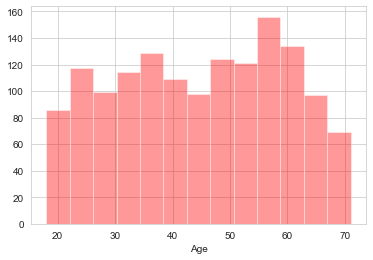

In [17]:
sns.set_style('whitegrid')
sns.distplot(mac['Age'], kde = False, color ='red')

<AxesSubplot:xlabel='Gender', ylabel='count'>

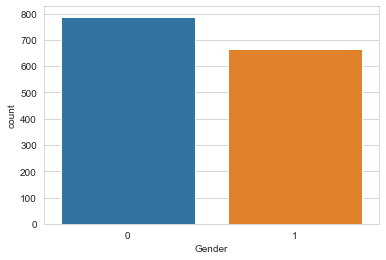

In [18]:
sns.countplot(data=mac, x = 'Gender')

<AxesSubplot:xlabel='VisitFrequency', ylabel='Age'>

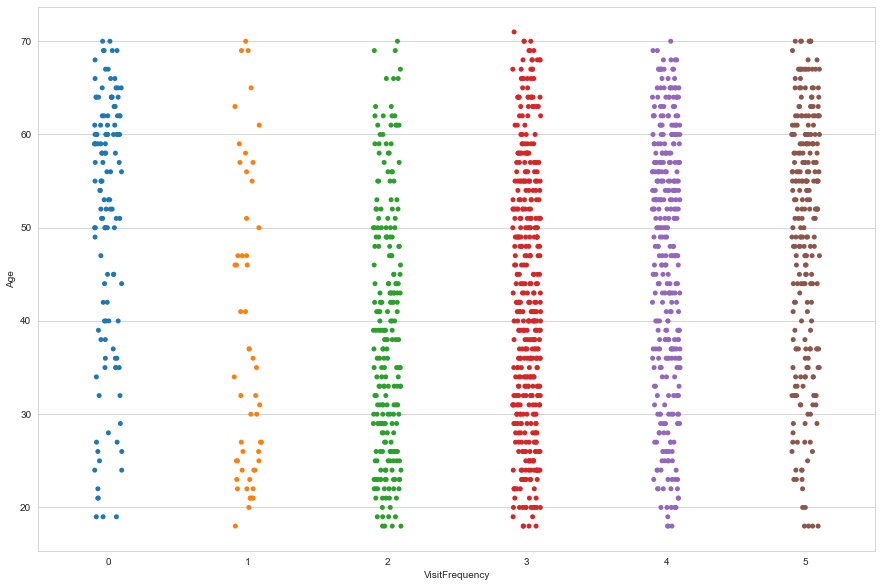

In [19]:
plt.figure(figsize=(15,10))
sns.stripplot(x ='VisitFrequency', y ='Age', data =mac,
              jitter = True, dodge = True)

<AxesSubplot:xlabel='tasty', ylabel='count'>

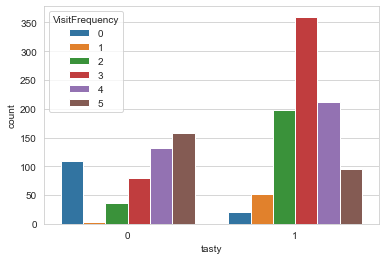

In [20]:
sns.countplot(data=mac, x = 'tasty',hue='VisitFrequency')

<AxesSubplot:xlabel='spicy', ylabel='count'>

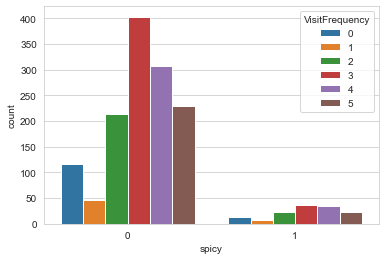

In [21]:
sns.countplot(data=mac, x = 'spicy',hue='VisitFrequency')

<AxesSubplot:xlabel='fast', ylabel='count'>

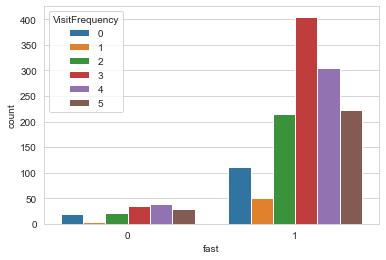

In [22]:
sns.countplot(data=mac, x = 'fast',hue='VisitFrequency')

<AxesSubplot:xlabel='convenient', ylabel='count'>

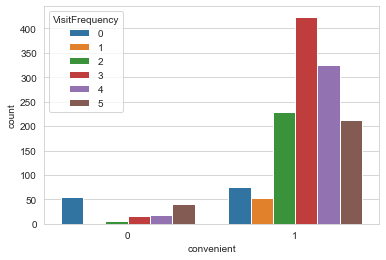

In [23]:
sns.countplot(data=mac, x = 'convenient',hue='VisitFrequency')

<AxesSubplot:xlabel='yummy', ylabel='count'>

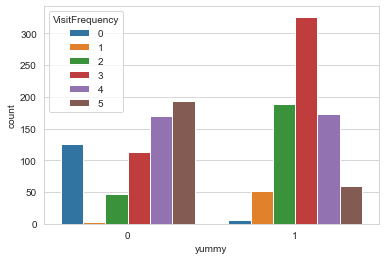

In [24]:
sns.countplot(data=mac, x = 'yummy',hue='VisitFrequency')

## K-mode clustering

In [33]:
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8208.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 342, cost: 6832.0
Run 1, iteration: 2/100, moves: 190, cost: 6707.0
Run 1, iteration: 3/100, moves: 7, cost: 6707.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves

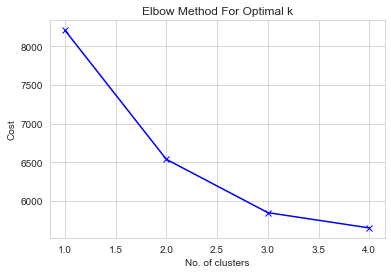

In [32]:
cost=[]
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(mac)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2)
mac['Cluster'] = kmeans.fit_predict(mac)

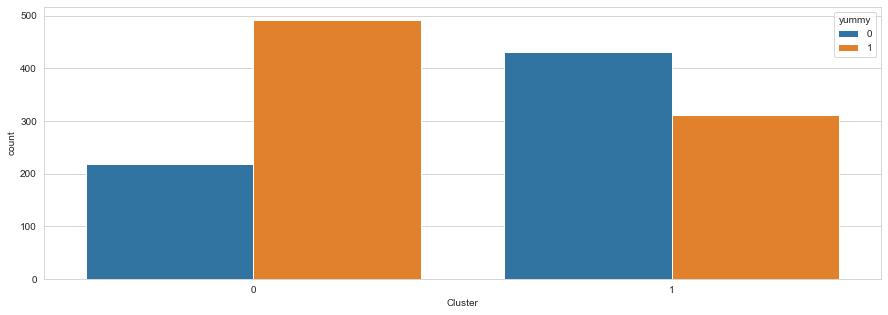

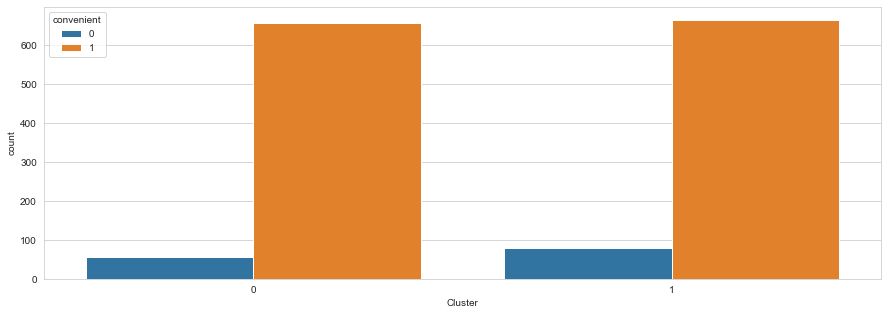

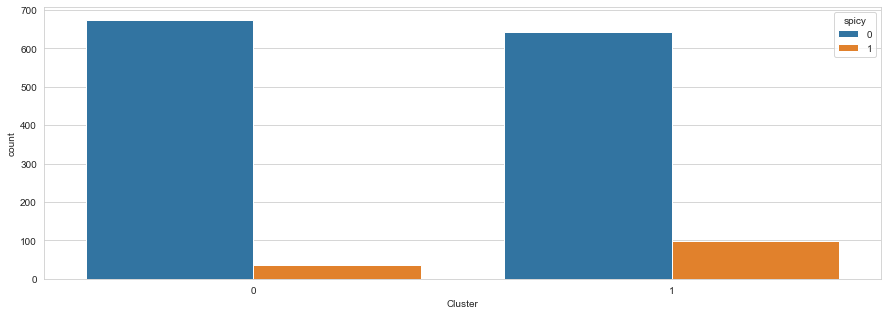

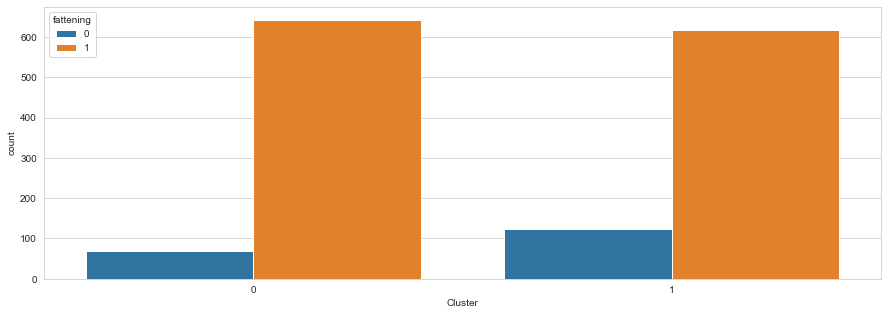

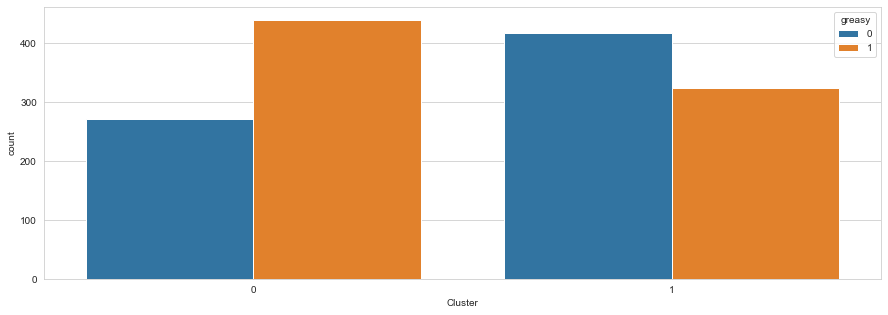

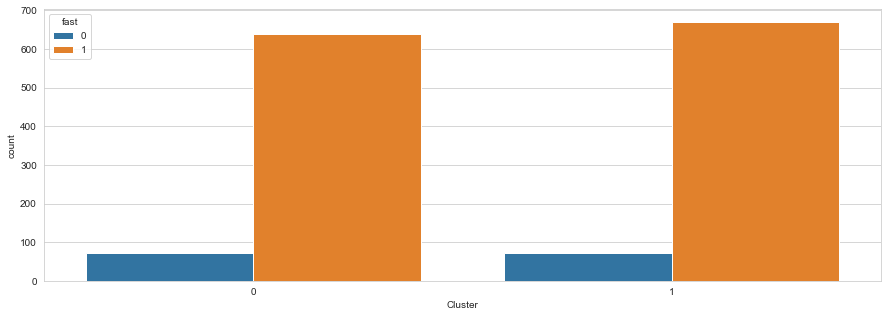

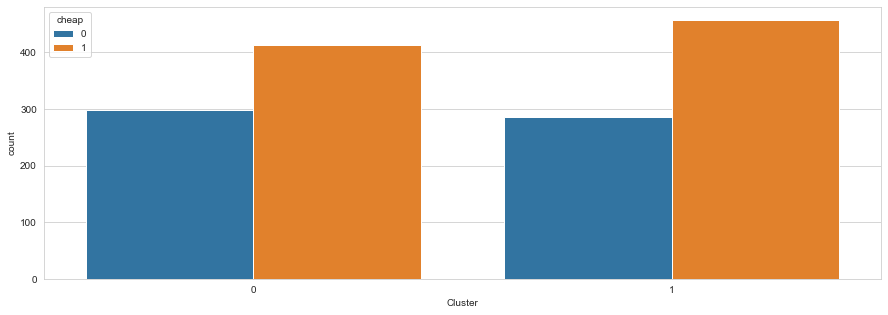

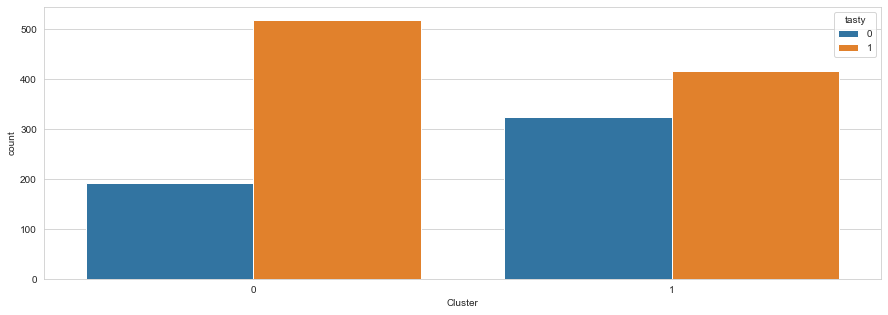

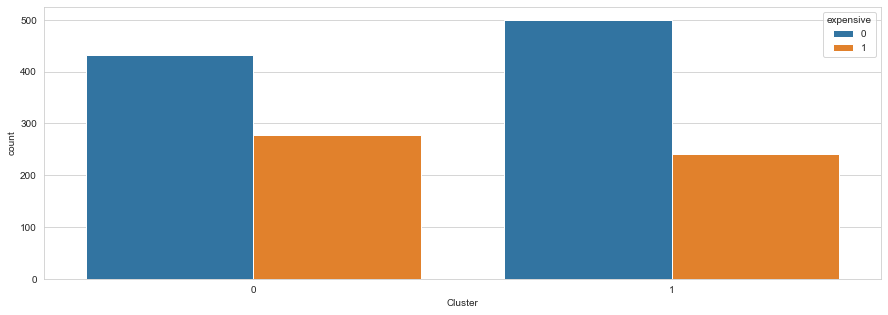

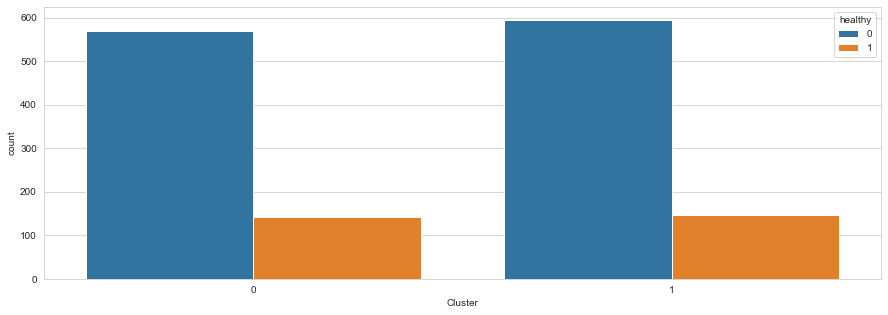

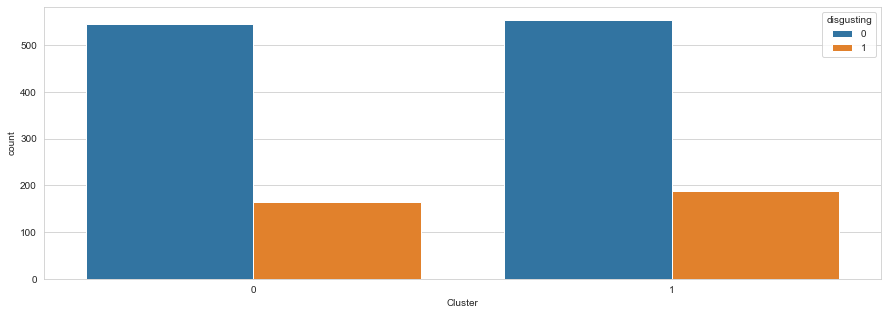

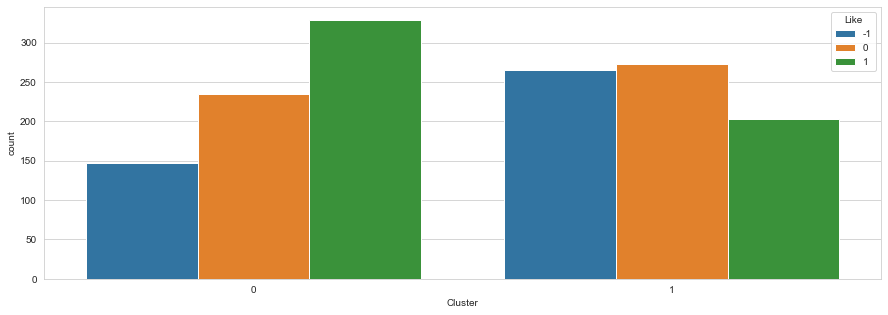

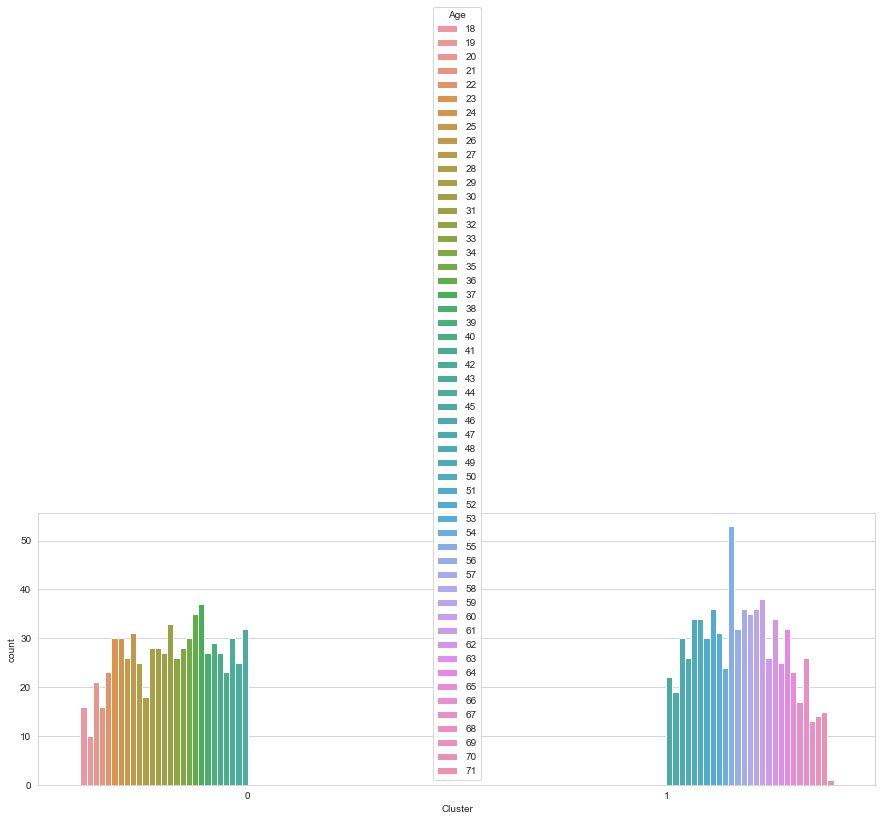

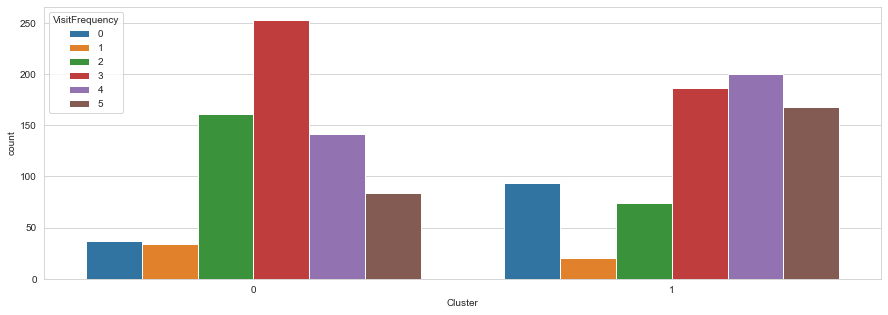

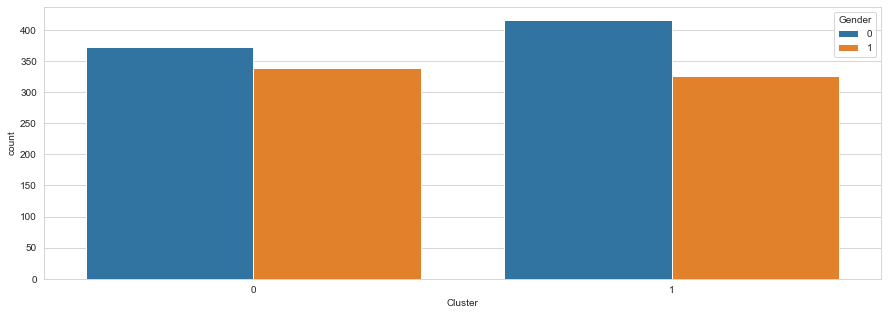

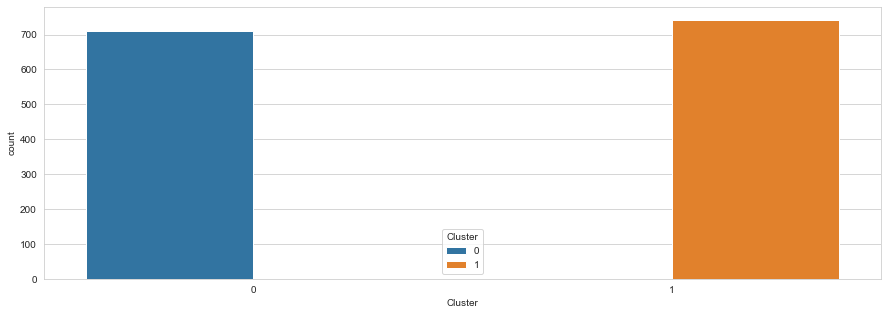

In [35]:
for col in mac:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = mac)
    plt.show()

Based on the plots above, these are the insights that I was able to gather. There may be more insights that I'm not seeing, or other visualization methods could show more interesting observations. Please comment if you feel there is anything I missed!

yummy: Larger population of people who finds yummy falls in cluster 1 spicy: Larger population of people who finds spicy falls in cluster 0 greasy: Larger population of people who finds yummy greasy in cluster 0 tasty: Larger population of people who finds tasty falls in cluster 1 expensive: Larger population of people who finds not expensive falls in cluster 0 Like: Larger population of people who finds the service good falls in cluster 1 Age: People will age around 35 to 50 visits the more and falls in cluster 0 VisitFrequency: People who visits the store once a month are more present in cluster 1 Gender: More female visits the store and more of them falls in cluster 0